In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 25.0 MB/s eta 0:00:00


In [ ]:
! yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/databubblerow/data.yaml epochs=200 imgsz=640 batch=16

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 137MB/s]
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/databubblerow/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, sav


image 1/1 /content/Screenshot 2024-12-19 at 23.54.53.png: 640x480 162 rowss, 34.0ms
Speed: 3.7ms preprocess, 34.0ms inference, 746.4ms postprocess per image at shape (1, 3, 640, 480)


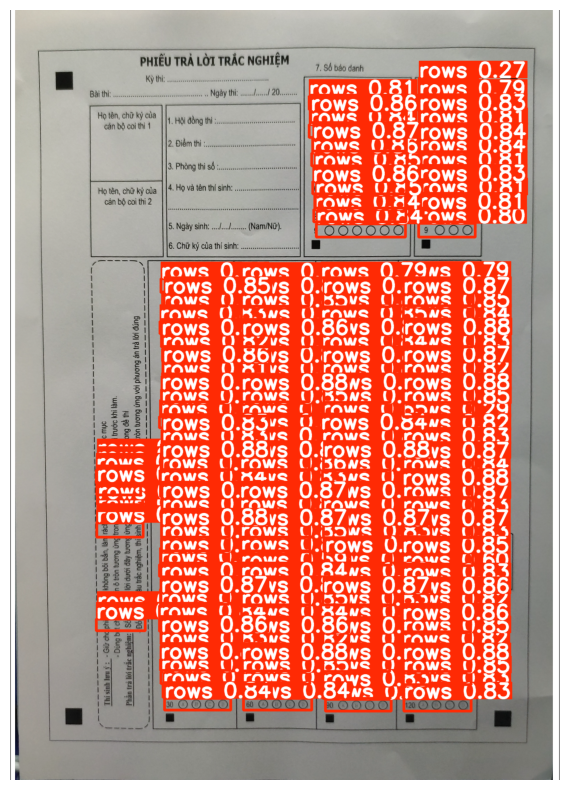

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Chạy inference trên tập test
# results = model('/content/drive/MyDrive/FaceAntiSpoofing/data/test/images/1-10-_png.rf.80cfb1d9b9a7ac32c87599237515d2ae.jpg', save=True)
results = model('/content/Screenshot 2024-12-19 at 23.54.53.png')


# Lấy hình ảnh với kết quả inference
result_image = results[0].plot()

# Hiển thị ảnh
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()


image 1/1 /content/Screenshot 2024-12-19 at 23.54.53.png: 640x480 162 rowss, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


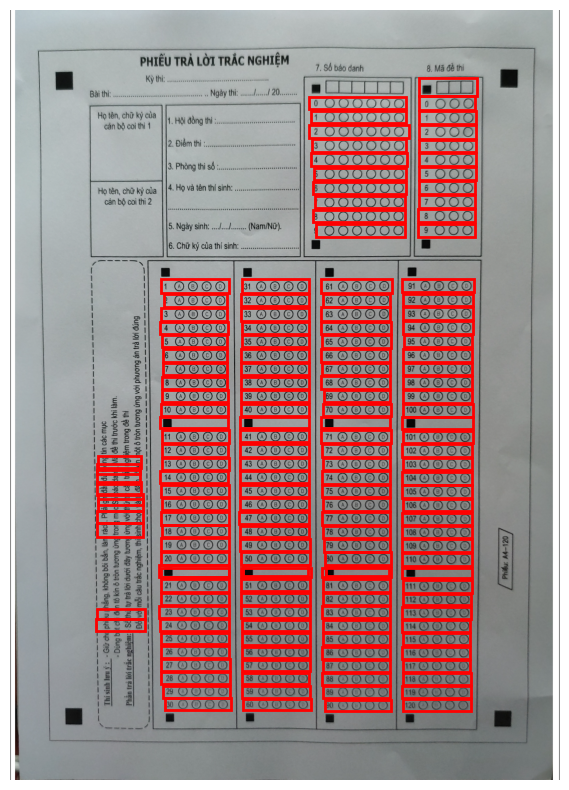

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Chạy inference trên ảnh
results = model('/content/Screenshot 2024-12-19 at 23.54.53.png')

# Lấy các thông tin dự đoán từ results
boxes = results[0].boxes  # các bounding boxes
confidence = boxes.conf  # xác suất (confidence)

# Lấy hình ảnh gốc
img = plt.imread('/content/Screenshot 2024-12-19 at 23.54.53.png')

# Tạo một hình ảnh mới với kết quả
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

# Vẽ chỉ bounding boxes lên ảnh, không có nhãn và xác suất
for i in range(len(boxes.xywh)):
    # Lấy thông tin bounding box từ tensor
    x1, y1, w, h = boxes.xywh[i].tolist()  # Chuyển tensor thành list
    # Vẽ hộp bao (bounding box) mà không vẽ nhãn hay xác suất
    ax.add_patch(plt.Rectangle((x1 - w/2, y1 - h/2), w, h, fill=False, color='red', linewidth=2))

# Tắt trục và hiển thị ảnh
ax.axis('off')
plt.show()


In [ ]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.8823, 0.8816, 0.8806, 0.8805, 0.8798, 0.8797, 0.8768, 0.8764, 0.8752, 0.8747, 0.8737, 0.8735, 0.8723, 0.8723, 0.8719, 0.8715, 0.8707, 0.8705, 0.8690, 0.8690, 0.8687, 0.8685, 0.8680, 0.8668, 0.8659, 0.8659, 0.8649, 0.8640, 0.8640, 0.8638, 0


image 1/1 /content/Screenshot 2024-12-20 at 00.10.26.png: 640x352 10 rowss, 59.8ms
Speed: 2.2ms preprocess, 59.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 352)


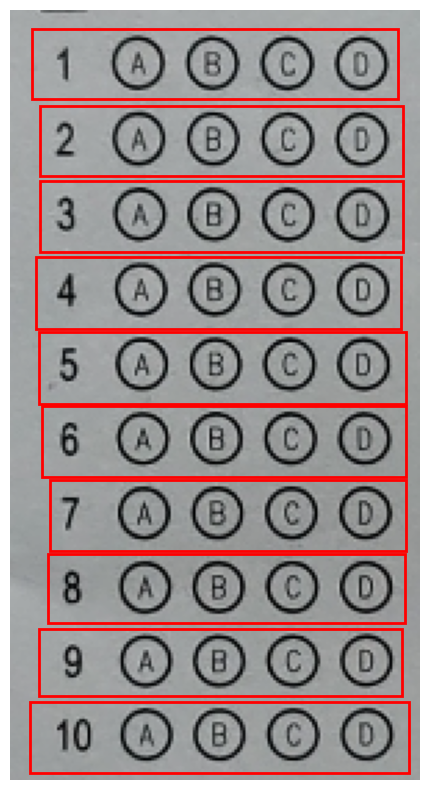

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Chạy inference trên ảnh
results = model('/content/Screenshot 2024-12-20 at 00.10.26.png')

# Lấy các thông tin dự đoán từ results
boxes = results[0].boxes  # các bounding boxes
confidence = boxes.conf  # xác suất (confidence)

# Lấy hình ảnh gốc
img = plt.imread('/content/Screenshot 2024-12-20 at 00.10.26.png')

# Tạo một hình ảnh mới với kết quả
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

# Vẽ chỉ bounding boxes lên ảnh, không có nhãn và xác suất
for i in range(len(boxes.xywh)):
    # Lấy thông tin bounding box từ tensor
    x1, y1, w, h = boxes.xywh[i].tolist()  # Chuyển tensor thành list
    # Vẽ hộp bao (bounding box) mà không vẽ nhãn hay xác suất
    ax.add_patch(plt.Rectangle((x1 - w/2, y1 - h/2), w, h, fill=False, color='red', linewidth=2))

# Tắt trục và hiển thị ảnh
ax.axis('off')
plt.show()



image 1/1 /content/1.jpg: 640x480 134 rowss, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


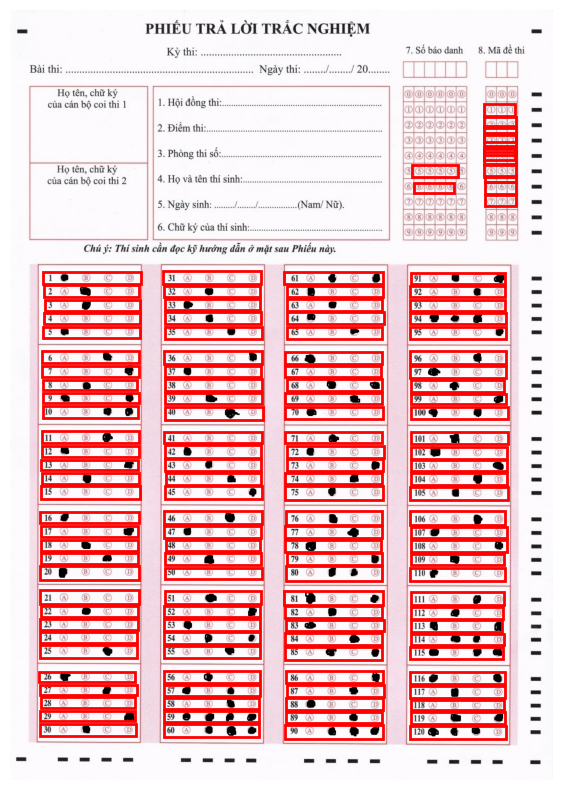

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Chạy inference trên ảnh
results = model('/content/1.jpg')

# Lấy các thông tin dự đoán từ results
boxes = results[0].boxes  # các bounding boxes
confidence = boxes.conf  # xác suất (confidence)

# Lấy hình ảnh gốc
img = plt.imread('/content/1.jpg')

# Tạo một hình ảnh mới với kết quả
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

# Vẽ chỉ bounding boxes lên ảnh, không có nhãn và xác suất
for i in range(len(boxes.xywh)):
    # Lấy thông tin bounding box từ tensor
    x1, y1, w, h = boxes.xywh[i].tolist()  # Chuyển tensor thành list
    # Vẽ hộp bao (bounding box) mà không vẽ nhãn hay xác suất
    ax.add_patch(plt.Rectangle((x1 - w/2, y1 - h/2), w, h, fill=False, color='red', linewidth=2))

# Tắt trục và hiển thị ảnh
ax.axis('off')
plt.show()



0: 640x352 10 rowss, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


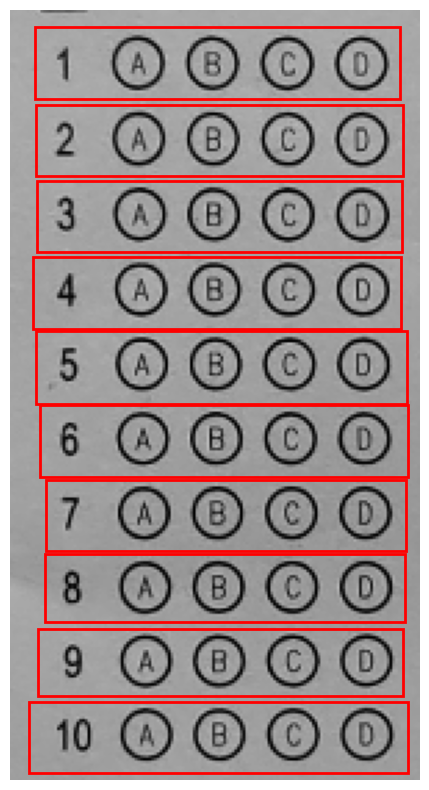

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Đọc ảnh gốc và chuyển sang đen trắng (grayscale)
img = cv2.imread('/content/Screenshot 2024-12-20 at 00.10.26.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Chuyển ảnh đen trắng (grayscale) thành ảnh RGB
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

# Chạy inference trên ảnh đã chuyển sang RGB
results = model(img_rgb)

# Lấy các thông tin dự đoán từ results
boxes = results[0].boxes  # các bounding boxes
confidence = boxes.conf  # xác suất (confidence)

# Tạo một hình ảnh mới với kết quả
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh RGB

# Vẽ chỉ bounding boxes lên ảnh, không có nhãn và xác suất
for i in range(len(boxes.xywh)):
    # Lấy thông tin bounding box từ tensor
    x1, y1, w, h = boxes.xywh[i].tolist()  # Chuyển tensor thành list
    # Vẽ hộp bao (bounding box) mà không vẽ nhãn hay xác suất
    ax.add_patch(plt.Rectangle((x1 - w/2, y1 - h/2), w, h, fill=False, color='red', linewidth=2))

# Tắt trục và hiển thị ảnh
ax.axis('off')
plt.show()



0: 640x480 140 rowss, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


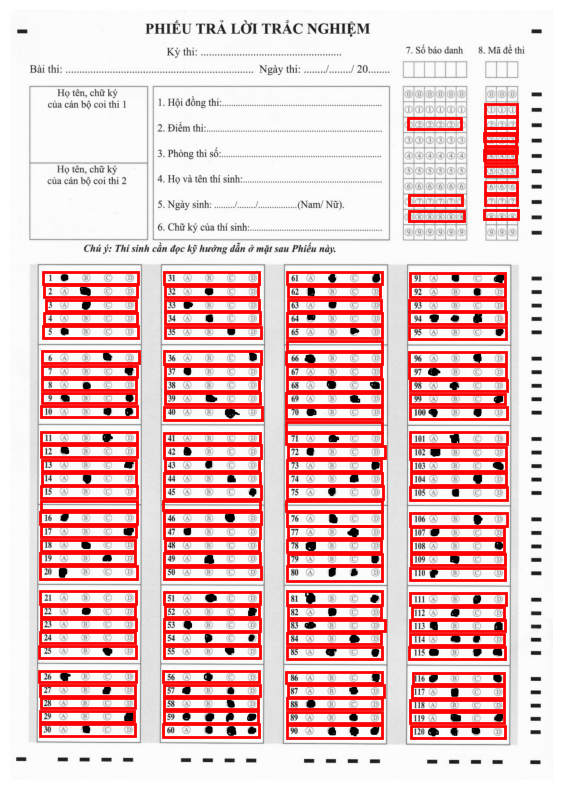

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load model đã huấn luyện
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Đọc ảnh gốc và chuyển sang đen trắng (grayscale)
img = cv2.imread('/content/1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Chuyển ảnh xám (grayscale) thành ảnh RGB
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

# Chạy inference trên ảnh đã chuyển sang RGB
results = model(img_rgb)

# Lấy các thông tin dự đoán từ results
boxes = results[0].boxes  # các bounding boxes
confidence = boxes.conf  # xác suất (confidence)

# Tạo một hình ảnh mới với kết quả
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh RGB

# Vẽ chỉ bounding boxes lên ảnh, không có nhãn và xác suất
for i in range(len(boxes.xywh)):
    # Lấy thông tin bounding box từ tensor
    x1, y1, w, h = boxes.xywh[i].tolist()  # Chuyển tensor thành list
    # Vẽ hộp bao (bounding box) mà không vẽ nhãn hay xác suất
    ax.add_patch(plt.Rectangle((x1 - w/2, y1 - h/2), w, h, fill=False, color='red', linewidth=2))

# Tắt trục và hiển thị ảnh
ax.axis('off')
plt.show()
